<h1 align="center">
    <img 
        src="./img/Microsoft-Logo.png" 
        width="400"/>
</h1>
<h1 align="center">
    <b>Practical Guide</b>
</h1>
<h4 align="center">
    for the creation of an AI Solution using an accelerator from the <a href="https://www.ds-toolkit.com/">Data Science Toolkit</a>
</h4>

# What to expect

* **Challenge 1:** *Automatically determine relevant features from the set of questions.*
* **Challenge 2:** *From the dataset, fill out the dataset of the new features defined.*
* **Challenge 3:** *Fit and evaluate regression models using the features of the previous step as inputs and the metrics evaluated as outputs. Then apply SHAP to the newly created models.*

# Challenge 1: *Determine relevant features from the questions*

Here we will use the set of questions and leverage an LLM to determine what would be good features to try and understand the resulting metrics.

## Challenge 1 - Step 1:  Let's, first, install the required packages and libraries.

>This is going to be done in a quiet mode, and only errors will be displayed if they occur. If you like to see what is going to be installed look at the [requirements.txt](./requirements.txt) file.

In summary two main tools will be installed that will be used in this notebook:

* **genAISHAP**. Is the library containing the tools for the DS Toolkit.
* **shap**. A popular library used to help with interpretability.

In [5]:
%%time
!pip install -q -q -r requirements.txt

CPU times: user 32.4 ms, sys: 14 ms, total: 46.5 ms
Wall time: 2.4 s


In [6]:
%%time
import pandas as pd
from genaishap import Featurizer, GenAIExplainer
import matplotlib.pyplot as plt
import shap
from IPython.display import Markdown, display

CPU times: user 67 μs, sys: 11 μs, total: 78 μs
Wall time: 83.7 μs


In [7]:
shap.initjs()

### Some definitions:

* **Context prescision:** Measures how much of the generated output is relevant and aligns with the context provided in the input.
* **Context recall:** Measures how much of the relevant information in the input context is included in the output.
* **Faithfulness:** Measures how accurate and truthful the generated output is in relation to the input context and factual correctness. Faithfulness is about avoiding "hallucinations" (made-up or false information).

Below, the dataset of questions, retrieved contexts, generated and expected responses and their corresponding metrics is presented. Remember that this dataset is generated following the same procedure explained in the previous notebook.

In [8]:
df_test_dataset = pd.read_json('./test-dataset.json', orient='records')
df_test_dataset

,user_input,retrieved_contexts,response,reference,faithfulness,context_precision,context_recall
0,Can you provide for me the three highlights fo...,"[31. In 2018, to align with industry best prac...",The three highlights for the GHG emissions sec...,"Sure, they are: \n1. 65% cumulative GHG emissi...",1.000000,0.0,0.000000
1,What percentage of waste from Google's offices...,[Performance highlights\nThe following section...,"In 2021, 78% of waste from Google's global dat...",Sixty-four percent.,1.000000,0.0,0.000000
2,Can you present me with the performance highli...,"[Education\nFor more than 40 years, we’ve work...",The performance highlights for empowering user...,Sure! The Performance Highlights for Empowerin...,1.000000,0.0,0.000000
3,What was the listed key achievement regarding ...,[Our approach\nWe believe that every business ...,There is no listed key achievement for Google ...,"In 2017, Google became the first major company...",1.000000,1.0,1.000000
4,Did Google reach its intended Waste target und...,[BUILDING BETTER DEVICES AND SERVICES\nTarget ...,"Yes, in 2021, Google achieved the UL 2799 Zero...","No, this target has not been met in 2021. Howe...",0.666667,1.0,1.000000
5,How many EV charging locations were there on G...,[This guidance does not recognize existing ren...,The provided context does not specify the numb...,200000,1.000000,0.0,0.000000
6,On what page of the report can I find the perf...,"[Employee Recruitment, Inclusion and Performan...",The performance highlights for the Empowering ...,The performance highlights for Empowering User...,0.000000,0.0,0.000000
7,Can you please provide for me the glossary of ...,[GRI INDEX\nGRI 304 - Biodiversity\nGRI 103 Ma...,I'm unable to provide the glossary of the docu...,"Sure, here is the glossary:\nGlossary\nCFE: ca...",0.500000,0.0,0.000000
8,On what page can I find details about Amazons ...,[IntroductionSustainability\nDriving Climate S...,You can find details about Amazon's climate so...,You can find information on driving climate so...,0.000000,0.0,0.000000
9,"For the listed Renewable Energy goals, by when...",[IntroductionSustainability\nDriving Climate S...,Amazon intends to have all operations powered ...,Amazon set the goal of becoming powered by 100...,1.000000,1.0,0.000000


## Challenge 1 - Step 2: Let's extract features from the questions in the dataset
> To do this, we will use the function `Featurizer` from the **genAISHAP** library.
> The features created are then displayed. Remember that these features are generated automatically.

In [9]:
%%time

# The Featurizer is part of the DS Toolkit and is able to take the list of provided questions and create a dataset of features for them automatically.
featurizer = Featurizer.from_pandas(df_test_dataset)
featurizer.create_features_using_azure_openai(
    deployment_name="gpt-4o", # Update with the name of your Azure OpenAI LLM deployment name
    num_features=12
)
print(featurizer.features.model_dump_json(indent=4))

{
    "features": [
        {
            "feature": "there_is_any_company_identified_in_the_question",
            "ftype": "boolean"
        },
        {
            "feature": "list_of_companies_identified_in_the_question",
            "ftype": "list_of_strings"
        },
        {
            "feature": "there_is_any_initiative_or_program_identified_in_the_question",
            "ftype": "boolean"
        },
        {
            "feature": "list_of_initiatives_or_programs_identified_in_the_question",
            "ftype": "list_of_strings"
        },
        {
            "feature": "there_is_any_financial_or_environmental_metric_identified_in_the_question",
            "ftype": "boolean"
        },
        {
            "feature": "list_of_financial_or_environmental_metrics_identified_in_the_question",
            "ftype": "list_of_strings"
        },
        {
            "feature": "there_is_any_specific_year_identified_in_the_question",
            "ftype": "boolean"
        }

# Challenge 2: From the dataset, fill out the dataset of the new features defined.

In [10]:
%%time

featurizer.fill_out_features_using_azure_openai(
    deployment_name="gpt-4o", 
    batch_size=20
)

  0%|          | 0/3 [00:00<?, ?it/s]

CPU times: user 91.1 ms, sys: 4.88 ms, total: 96 ms
Wall time: 2min 49s


/home/jupyter-ricastro1/.local/lib/python3.12/site-packages/genaishap/featurize.py:252: UserWarning: There are differences in some question input and output review the version of the language model, try to use a bigger model >=gpt-4o.  The differences are: 
QIN: What was the listed key achievement regarding sustainbility and climate change for Google in 2077?
QOU: What was the listed key achievement regarding sustainability and climate change for Google in 2077?

QIN: What were Amazon's Carbon Intesity values in (C02e per $ of GMS) in the years 2019 to 2022?
QOU: What were Amazon's Carbon Intensity values in (C02e per $ of GMS) in the years 2019 to 2022?

QIN: On what page can of the report can I find information about The Climate Page Fund?
QOU: On what page of the report can I find information about The Climate Page Fund?

QIN: What household brands were featured in the in the climate pledge infographic on page 14?
QOU: What household brands were featured in the climate pledge infogr

In [11]:
df_features = featurizer.to_pandas()
df_test_dataset.join(df_features)

,user_input,retrieved_contexts,response,reference,faithfulness,context_precision,context_recall,there_is_any_company_identified_in_the_question,list_of_companies_identified_in_the_question,there_is_any_initiative_or_program_identified_in_the_question,list_of_initiatives_or_programs_identified_in_the_question,there_is_any_financial_or_environmental_metric_identified_in_the_question,list_of_financial_or_environmental_metrics_identified_in_the_question,there_is_any_specific_year_identified_in_the_question,list_of_years_identified_in_the_question,is_a_question_about_trends_or_changes_over_time,is_a_question_about_identification_of_factors_or_insights,is_a_question_related_to_a_specific_page_or_section,is_a_question_about_goals_or_targets
0,Can you provide for me the three highlights fo...,"[31. In 2018, to align with industry best prac...",The three highlights for the GHG emissions sec...,"Sure, they are: \n1. 65% cumulative GHG emissi...",1.000000,0.0,0.000000,False,[],True,[Advancing Carbon-Free Energy],True,[GHG emissions],False,[],False,True,True,False
1,What percentage of waste from Google's offices...,[Performance highlights\nThe following section...,"In 2021, 78% of waste from Google's global dat...",Sixty-four percent.,1.000000,0.0,0.000000,True,[Google],False,[],True,[waste diversion],True,[2021],False,False,False,False
2,Can you present me with the performance highli...,"[Education\nFor more than 40 years, we’ve work...",The performance highlights for empowering user...,Sure! The Performance Highlights for Empowerin...,1.000000,0.0,0.000000,False,[],True,[Empowering Users With Technology],False,[],False,[],False,True,True,False
3,What was the listed key achievement regarding ...,[Our approach\nWe believe that every business ...,There is no listed key achievement for Google ...,"In 2017, Google became the first major company...",1.000000,1.0,1.000000,True,[Google],False,[],True,"[sustainability, climate change]",True,[2077],False,True,False,True
4,Did Google reach its intended Waste target und...,[BUILDING BETTER DEVICES AND SERVICES\nTarget ...,"Yes, in 2021, Google achieved the UL 2799 Zero...","No, this target has not been met in 2021. Howe...",0.666667,1.0,1.000000,True,[Google],True,[Building Better Devices and Services],True,[waste target],True,[2021],False,False,False,True
5,How many EV charging locations were there on G...,[This guidance does not recognize existing ren...,The provided context does not specify the numb...,200000,1.000000,0.0,0.000000,True,[Google],False,[],True,[EV charging locations],True,[2021],False,False,False,False
6,On what page of the report can I find the perf...,"[Employee Recruitment, Inclusion and Performan...",The performance highlights for the Empowering ...,The performance highlights for Empowering User...,0.000000,0.0,0.000000,False,[],True,[Empowering Users With Technology],False,[],False,[],False,False,True,False
7,Can you please provide for me the glossary of ...,[GRI INDEX\nGRI 304 - Biodiversity\nGRI 103 Ma...,I'm unable to provide the glossary of the docu...,"Sure, here is the glossary:\nGlossary\nCFE: ca...",0.500000,0.0,0.000000,False,[],False,[],False,[],False,[],False,False,True,False
8,On what page can I find details about Amazons ...,[IntroductionSustainability\nDriving Climate S...,You can find details about Amazon's climate so...,You can find information on driving climate so...,0.000000,0.0,0.000000,True,[Amazon],False,[],True,[Climate solutions],False,[],False,False,True,False
9,"For the listed Renewable Energy goals, by when...",[IntroductionSustainability\nDriving Climate S...,Amazon intends to have all operations powered ...,Amazon set the goal of becoming powered by 100...,1.000000,1.0,0.000000,True,[Amazon],False,[],True,[Renewable Energy goals],False,[],False,False,False,True


# Challenge 3: 
## Challenge 3 - Step 1: Fit and evaluate regression models using the features of the previous step as inputs and the metrics evaluated as outputs.

In [12]:
genai_explainer = GenAIExplainer.from_pandas(df_test_dataset, df_features)
genai_explainer.feature_engineering()
genai_explainer.create_explainers()

Metric loop:   0%|          | 0/3 [00:00<?, ?it/s]

faithfulness:   0%|          | 0/3 [00:00<?, ?it/s]

/home/jupyter-ricastro1/.local/lib/python3.12/site-packages/genaishap/explainer.py:281: UserWarning: The best estimator for metric faithfulness is producing results that differs significantly with respect to the original metrics. This could lead to produce misleading explanations. Please change the features used to train the black-box model.
  warnings.warn(
/home/jupyter-ricastro1/.local/lib/python3.12/site-packages/genaishap/explainer.py:298: UserWarning: There are 8 estimated values in the metric faithfulness far from the original values. The following is the list of indexes [7, 24, 25, 26, 27, 36, 37, 40].
  warnings.warn(


context_precision:   0%|          | 0/3 [00:00<?, ?it/s]

/home/jupyter-ricastro1/.local/lib/python3.12/site-packages/genaishap/explainer.py:298: UserWarning: There are 4 estimated values in the metric context_precision far from the original values. The following is the list of indexes [24, 25, 26, 41].
  warnings.warn(


context_recall:   0%|          | 0/3 [00:00<?, ?it/s]

/home/jupyter-ricastro1/.local/lib/python3.12/site-packages/genaishap/explainer.py:298: UserWarning: There are 6 estimated values in the metric context_recall far from the original values. The following is the list of indexes [24, 25, 26, 27, 31, 41].
  warnings.warn(


### Show the `r2 score` of the created models

In [13]:
genai_explainer.r2_scores_

{'faithfulness': 0.5849711784955893,
 'context_precision': 0.8599935341214503,
 'context_recall': 0.8193188552594071}

### Show the fit results for a selected metric

In [15]:
metric = 'context_recall'
X = pd.DataFrame(genai_explainer.preprocessed_features)

df_metric = pd.DataFrame(genai_explainer.metrics)[[metric]]
df_metric['estimated_value'] = genai_explainer.estimators_[metric].predict(X)
df_metric['is_out_of_range'] = genai_explainer.is_out_of_range_[metric]

df_metric.style.apply(
    lambda s : [
        'background-color: yellow' if s.loc['is_out_of_range'] else '' for v in s.index
    ], axis=1)

,context_recall,estimated_value,is_out_of_range
0,0.000000,-0.010994,False
1,0.000000,0.050858,False
2,0.000000,-0.003538,False
3,1.000000,0.953185,False
4,1.000000,0.946505,False
5,0.000000,0.049490,False
6,0.000000,0.059755,False
7,0.000000,0.099437,False
8,0.000000,0.003235,False
9,0.000000,0.032507,False


## Challenge 3 - Step 2: Present the explainability results from SHAP
### For the selected metric show the SHAP values of each feature.

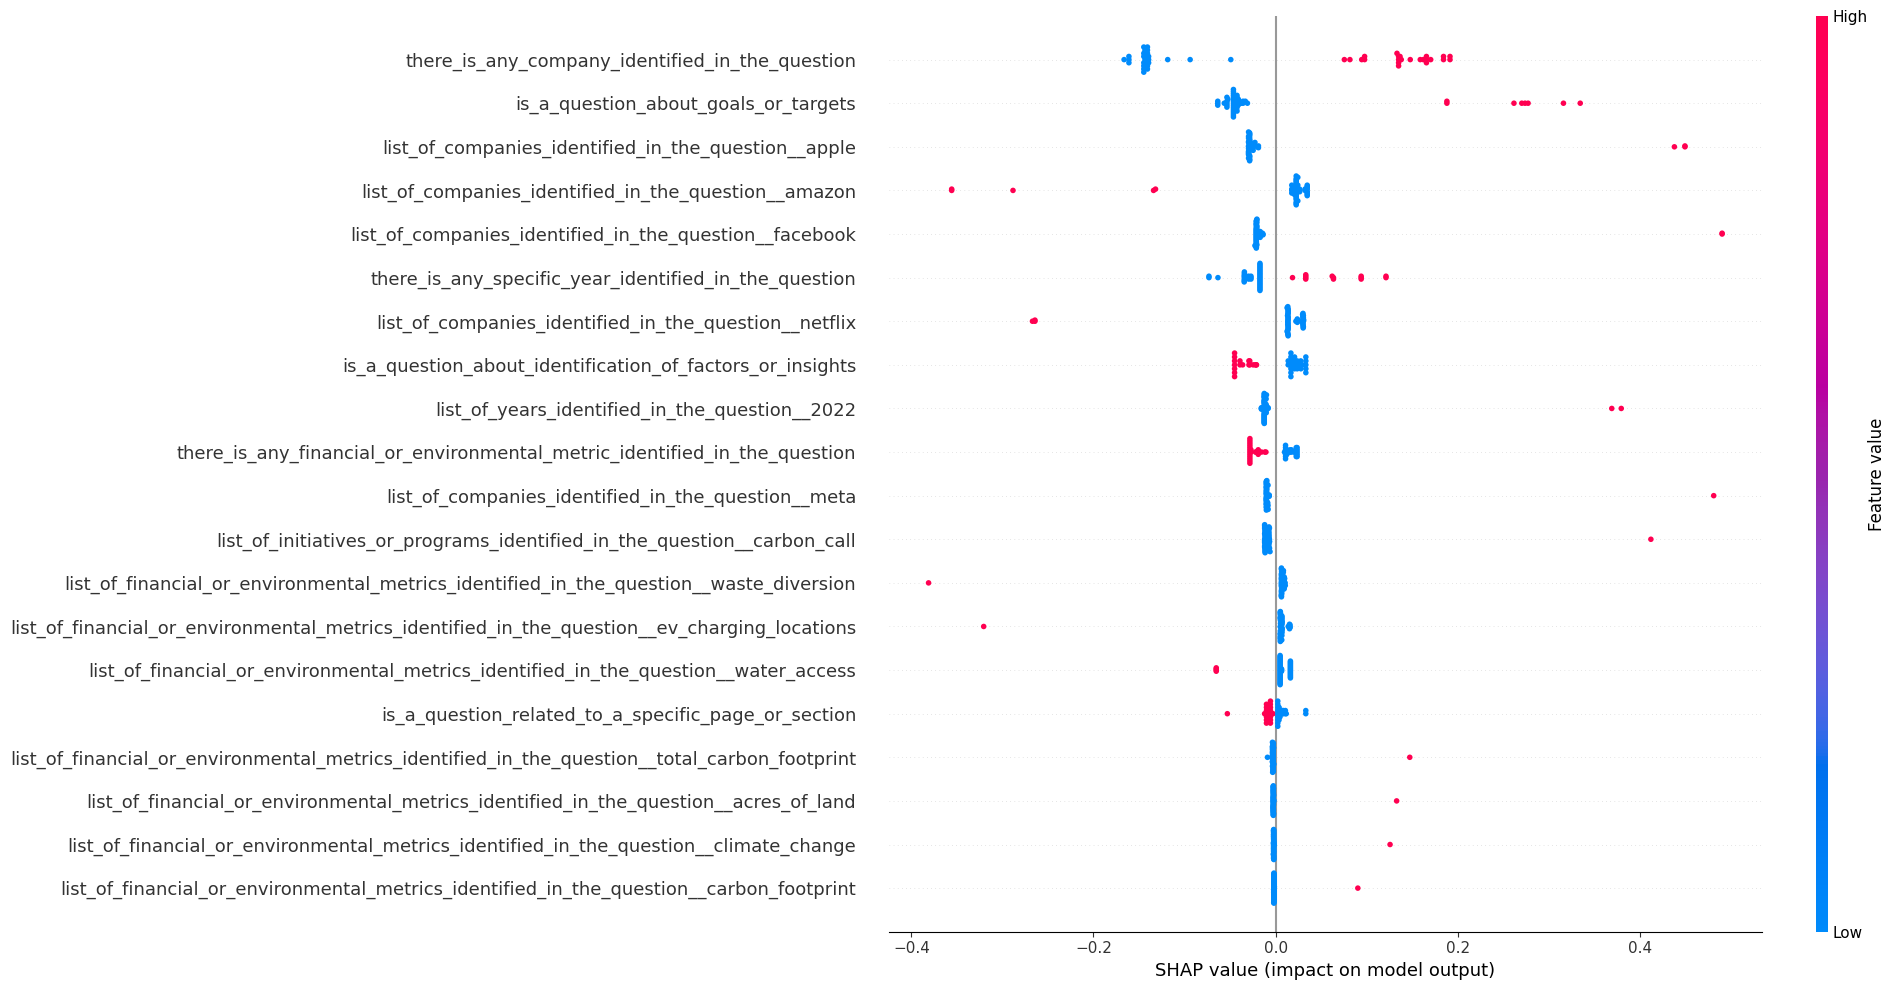

In [16]:
metric_explainer = genai_explainer.explainers_[metric]
shap_values = metric_explainer(X)
shap.summary_plot(shap_values, X, plot_size=(20,10))

### For a selected question, display the question, the retrieved contexts, the generated and expected answers, the metric value and the predicted metric from the model trained

In [17]:
index = 3

context = df_test_dataset.loc[index,'retrieved_contexts']
context_str = "\n".join([f"\n**CHUNK {i+1}:**\n\n{c}" for i, c in zip(range(len(context)),context)])


index_details = f"""
### INDEX {index}

**USER INPUT:**
{df_test_dataset.loc[index,'user_input']}

**RETRIEVED CONTEXT:**

{context_str}

**RESPONSE:**
{df_test_dataset.loc[index,'response']}

**REFERENCE:**
{df_test_dataset.loc[index,'reference']}

**METRIC:** {metric}

**METRIC Value:** {df_test_dataset.loc[index, metric]:.3f}

**MODEL ESTIMATED Value:** {df_metric.loc[index, 'estimated_value']:.3f}
"""

display(Markdown(index_details))


### INDEX 3

**USER INPUT:**
What was the listed key achievement regarding sustainbility and climate change for Google in 2077?

**RETRIEVED CONTEXT:**


**CHUNK 1:**

Our approach
We believe that every business has the opportunity and obligation to protect 
our planet. Sustainability is one of our core values at Google, and we strive  
to build sustainability into everything we do.
We’ve been a leader on sustainability and climate change since Google’s 
founding over 20 years ago. These are some of our key achievements over 
the past two decades:
2007:	We	became	the	first	major	company	to	be	carbon	neutral	for	our	operations.
2017:	We	became	the	first	major	company	to	match	100%	of	our	annual	electricity	
use	with	renewable	energy,			which	we’ve	achieved	for	five	consecutive	years.
2020:	We	issued	$5.75	billion	in	sustainability	bonds—the	largest	sustainability	 
or	green	bond	issuance	by	any	company	in	history	at	the	time.
2021:	We	matched	66%	of	our	data	center	electricity	use	with	regional 	 
carbon-free	sources,	on	an	hourly	basis.
Our sustainability strategy is focused on three key pillars: accelerating 
the transition to carbon-free energy and a circular economy, empowering 
everyone with technology, and benefiting the people and places where we 
operate (see Figure 1).
Figure	1	
SUSTAINABILITY STRATEGY OVERVIEW
We strive to build sustainability into everything we do
Empower	with	 
technology
Tackle major sustainability problems 
and drive net-positive impact using 
Google technologies, platforms, 
products, and services
Accelerate	carbon-free	 
and	circular	
Decouple business growth 
from the growth of carbon 
intensity and material use 
Benefit	people	 
and	places
Share benefits with the  
communities of our facilities,  
users, partners, and suppliers
2
Google Environmental Report 2022

**CHUNK 2:**

Empowering everyone with technology
To empower everyone with technology, we’ve committed to help 1 billion 
people make more sustainable choices by the end of 2022 through our core 
products. We introduced eco-friendly routing in Google Maps, new features 
to book flights or purchase appliances that have lower carbon footprints, 
and Nest Renew, a program to support clean energy from home. And when 
people come to Google Search with questions about climate change, we 
show information from authoritative sources like the United Nations.
Benefiting people and places
To benefit the people and places where we operate, we’ve set goals to 
replenish more water than we consume by 2030 and to support water security 
in communities where we operate. We’re focused on three areas: enhancing 
our stewardship of water resources across Google offices and data centers; 
replenishing our water use and improving watershed health and ecosystems 
in water-stressed communities; and sharing technology and tools that help 
everyone predict, prevent, and recover from water stress.
At Google, we remain steadfast in our commitment to sustainability, and we’ll 
continue to lead and encourage others to join us in improving the health of our 
planet. We’re proud of what we’ve achieved so far, and we’re energized to help 
move the world closer to a more sustainable and carbon-free future for all.
4
Google Environmental Report 2022

**RESPONSE:**
There is no listed key achievement for Google regarding sustainability and climate change in the year 2077.

**REFERENCE:**
In 2017, Google became the first major company to match 100% of their annual electricity use with renewable energy, which they've achieved for five consecutive years.

**METRIC:** context_recall

**METRIC Value:** 1.000

**MODEL ESTIMATED Value:** 0.953


### For that question, show the explainability for the predicted value.

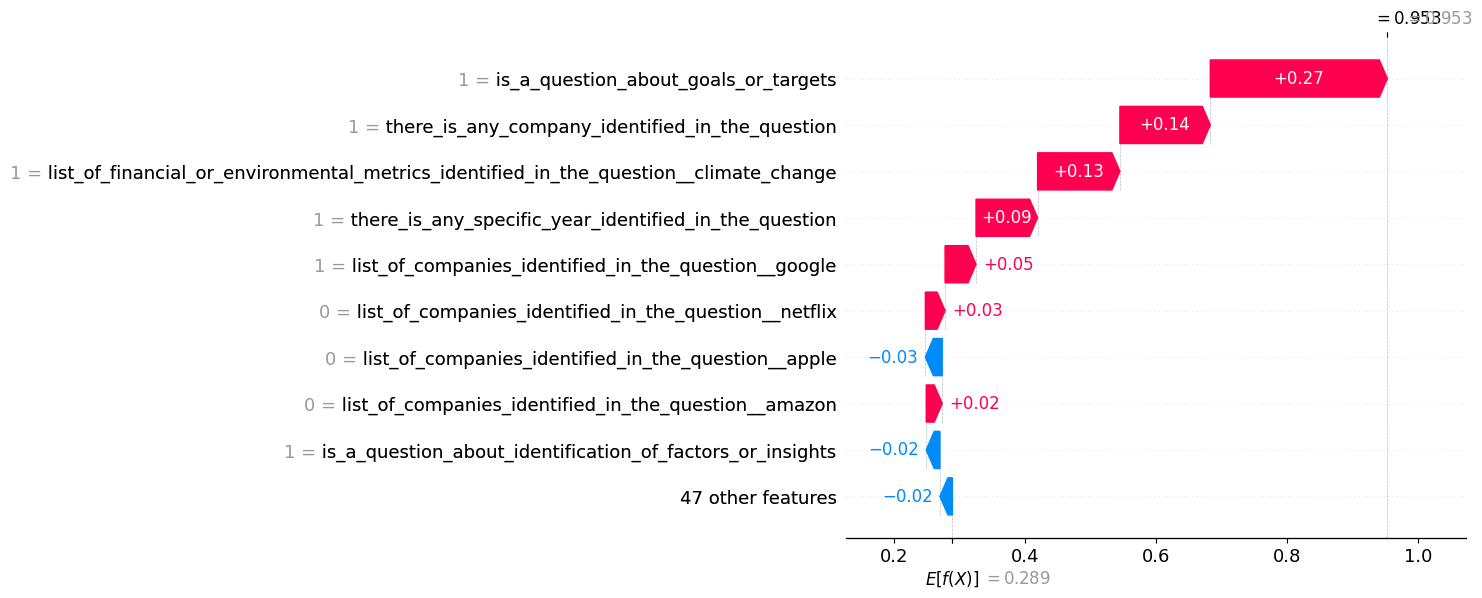

In [18]:
shap.waterfall_plot(shap_values[index])